# libraries

In [1]:
from nntool import unet
from utils.utilities import devtools
import os
import glob
import time
import joblib

import math
import tensorflow as tf
import pandas as pd
import numpy as np
import json
from datetime import datetime


import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean, rotate
from glob import glob
from datetime import datetime
import subprocess
from tqdm import tqdm


dtools = devtools()

In [2]:
import cv2
from skimage import exposure
from skimage import img_as_float
from scipy import ndimage
from skimage.util import random_noise
import random
from pprint import pprint

from dataflow import ImageOperations
from dataflow import DataFlow

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = joblib.load("./picklefiles/thold__req_img_mask_df_train")
val_df = joblib.load("./picklefiles/thold__req_img_mask_df_val")

failed_train_df = joblib.load("./picklefiles/thold__not_req_img_mask_df_train")
failed_val_df = joblib.load("./picklefiles/thold__not_req_img_mask_df_val")

In [4]:
train_df[train_df['x'] == '../data/coco-person/train/person_images/images/146675.jpg']

x  \
5681  ../data/coco-person/train/person_images/images...   

                                                      y  
5681  ../data/coco-person/train/person_masks/masks/1...

In [5]:
IMG_HEIGHT, IMG_WIDTH = 224, 224

In [6]:
X = io.imread('../data/coco-person/train/person_images/images/146675.jpg', as_gray=True)

# Test Generator Class

In [8]:
dob1 = DataFlow(train_df, failed_train_df,
                IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, as_gray=True,
                
                contrast_adjust=True, hist_equal=True,
                horizontal_flip=True, vertical_flip=False,
                rotation_range=30, zoom_range=2,
                gamma_correction=False, blur=True, add_noise=False,
                show_NOT_person_imgs=True,
                
                fit_op=True, shuffle_after_epoch=True
               )


dob2 = DataFlow(val_df, failed_val_df,
                IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, as_gray=True,
                
                contrast_adjust=True, hist_equal=True,
                horizontal_flip=False, vertical_flip=False,
                rotation_range=0, zoom_range=0,
                gamma_correction=False, blur=True, add_noise=False,
                show_NOT_person_imgs=False,
                
                fit_op=True, shuffle_after_epoch=True
               )


gen = dob1.generator()

<Figure size 432x288 with 0 Axes>

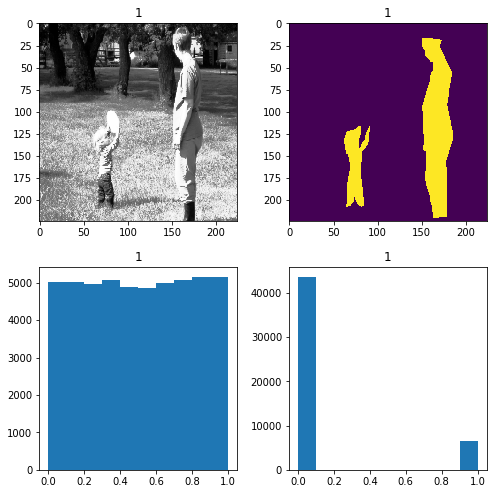

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

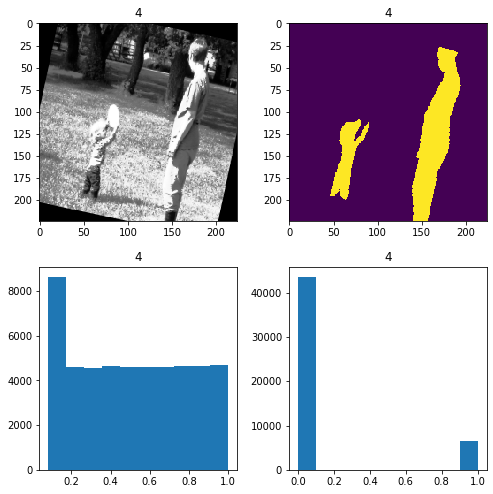

<Figure size 432x288 with 0 Axes>

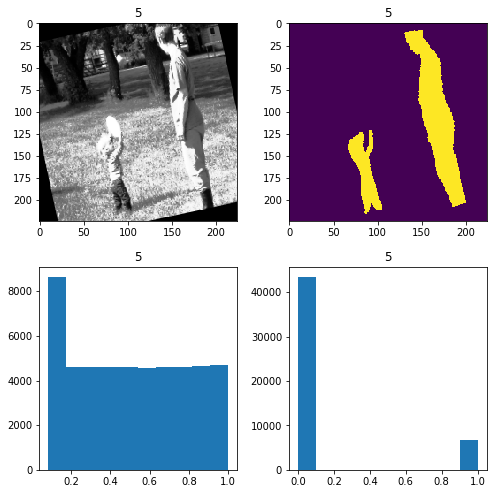

<Figure size 432x288 with 0 Axes>

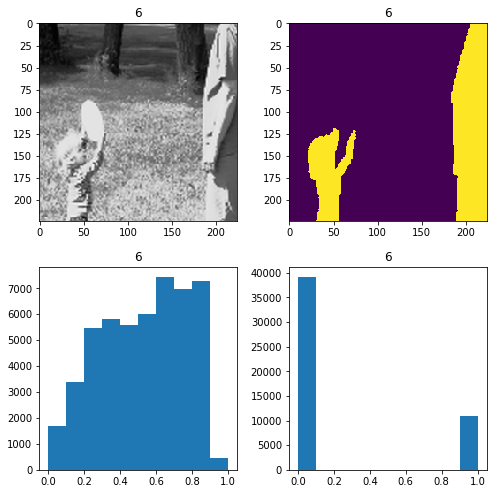

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

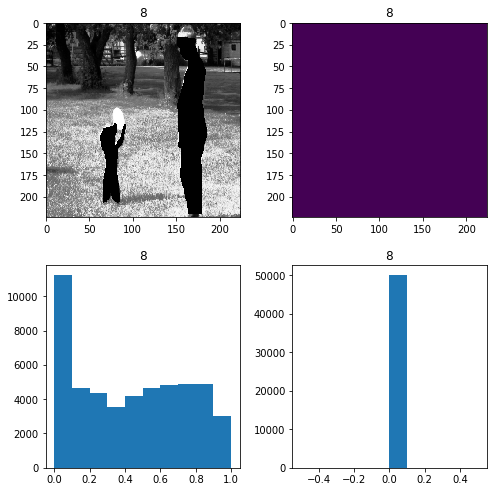

<Figure size 432x288 with 0 Axes>

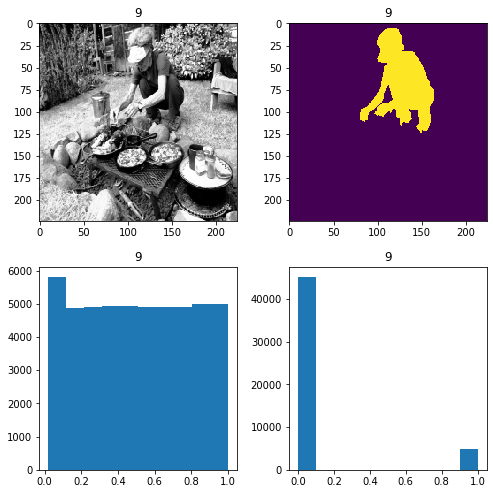

<Figure size 432x288 with 0 Axes>

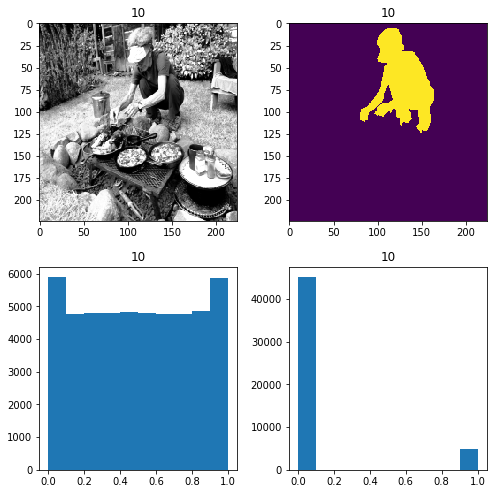

In [9]:
for i in range(10):

    x_,y_ = next(gen)

    plt.figure()
    f, ax = plt.subplots(2,2,figsize=(7,7))

    ax[0,0].title.set_text(str(i+1))
    ax[0,0].imshow(np.squeeze(x_),cmap='gray')

    ax[0,1].title.set_text(str(i+1))
    # y_ = (y_ - np.min(y_.flatten()))/(np.max(y_.flatten()) - np.min(y_.flatten()))
    # y_ = np.where(np.squeeze(y_)>0.5,1,0)
    
    # print(np.histogram_bin_edges(y_.flatten()))
    ax[0,1].imshow(np.squeeze(y_))

    ax[1,0].title.set_text(str(i+1))
    ax[1,0].hist(x_.flatten())

    ax[1,1].title.set_text(str(i+1))
    ax[1,1].hist(y_.flatten())

    plt.tight_layout()

In [10]:
np.where()

TypeError: where() missing 1 required positional argument: 'condition'